A. Moments of the data:
Mean: 0.050198
Variance: 0.010332
Skewness: 0.120445
Excess Kurtosis: 0.222927


B & C. Distribution Comparison:

Normal Distribution:
Parameters: μ=0.050198, σ=0.101598
KS test p-value: 0.996242
Log-likelihood: 867.793364
AIC: -1731.586729
BIC: -1721.771218

t Distribution:
Parameters: df=28.710241, loc=0.049867, scale=0.098001
KS test p-value: 0.996453
Log-likelihood: 868.709184
AIC: -1731.418369
BIC: -1716.695103


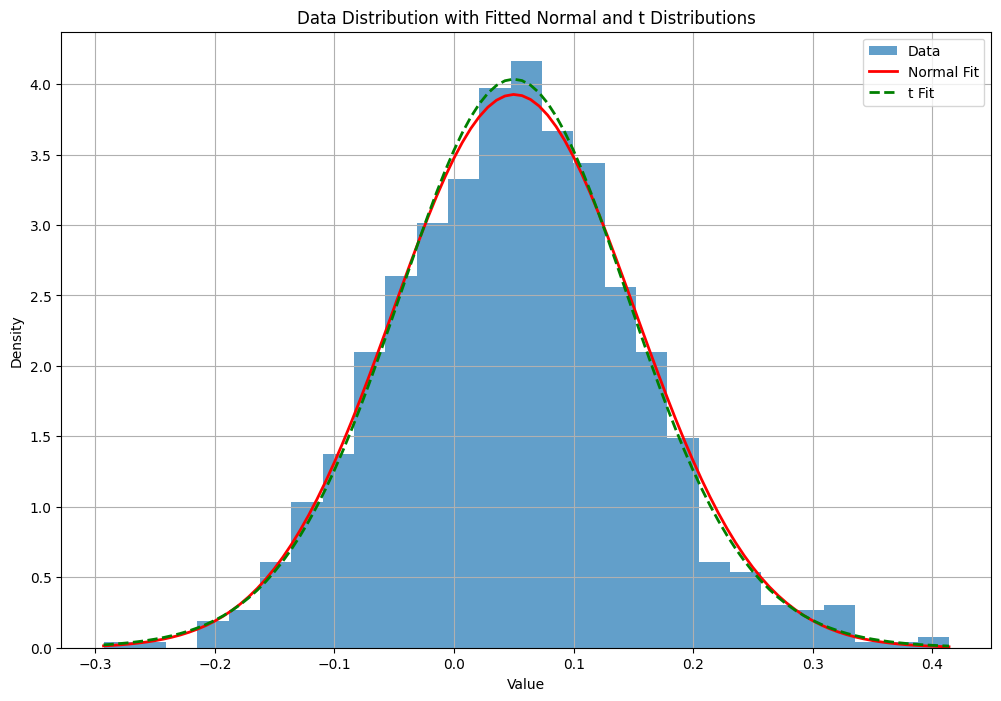

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def calculate_moments(data):
    """Calculate first four moments of the data"""
    mean = np.mean(data)
    var = np.var(data, ddof=1)
    skew = stats.skew(data)
    kurt = stats.kurtosis(data, fisher=True)  # Fisher kurtosis (excess kurtosis)
    return mean, var, skew, kurt

def fit_distributions(data):
    """Fit normal and t distributions to the data"""
    # Fit normal distribution
    norm_params = stats.norm.fit(data)
    
    # Fit t distribution
    t_params = stats.t.fit(data)
    
    return norm_params, t_params

def calculate_goodness_of_fit(data, norm_params, t_params):
    """Calculate various goodness of fit metrics"""
    # Kolmogorov-Smirnov test
    ks_norm = stats.kstest(data, 'norm', norm_params)
    ks_t = stats.kstest(data, 't', t_params)
    
    # Anderson-Darling test
    ad_norm = stats.anderson(data, 'norm')
    
    # Log-likelihood
    norm_ll = np.sum(stats.norm.logpdf(data, *norm_params))
    t_ll = np.sum(stats.t.logpdf(data, *t_params))
    
    # AIC
    k_norm = 2  # number of parameters for normal
    k_t = 3    # number of parameters for t
    n = len(data)
    
    aic_norm = 2 * k_norm - 2 * norm_ll
    aic_t = 2 * k_t - 2 * t_ll
    
    # BIC
    bic_norm = k_norm * np.log(n) - 2 * norm_ll
    bic_t = k_t * np.log(n) - 2 * t_ll
    
    return {
        'ks_norm': ks_norm,
        'ks_t': ks_t,
        'ad_norm': ad_norm,
        'log_likelihood': {'normal': norm_ll, 't': t_ll},
        'aic': {'normal': aic_norm, 't': aic_t},
        'bic': {'normal': bic_norm, 't': bic_t}
    }

def plot_distributions(data, norm_params, t_params):
    """Plot histogram with fitted distributions"""
    plt.figure(figsize=(12, 8))
    
    # Plot histogram of data
    plt.hist(data, bins='auto', density=True, alpha=0.7, label='Data')
    
    # Generate points for distribution curves
    x = np.linspace(min(data), max(data), 100)
    
    # Plot normal distribution
    plt.plot(x, stats.norm.pdf(x, *norm_params), 
            'r-', label='Normal Fit', linewidth=2)
    
    # Plot t distribution
    plt.plot(x, stats.t.pdf(x, *t_params), 
            'g--', label='t Fit', linewidth=2)
    
    plt.title('Data Distribution with Fitted Normal and t Distributions')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    
    return plt.gcf()

def analyze_distribution(file_path='problem1.csv'):
    """Main analysis function"""
    # Read data
    df = pd.read_csv(file_path)
    data = df['X'].values
    
    # A. Calculate moments
    mean, var, skew, kurt = calculate_moments(data)
    print("A. Moments of the data:")
    print(f"Mean: {mean:.6f}")
    print(f"Variance: {var:.6f}")
    print(f"Skewness: {skew:.6f}")
    print(f"Excess Kurtosis: {kurt:.6f}")
    print("\n")
    
    # Fit distributions
    norm_params, t_params = fit_distributions(data)
    
    # B & C. Compare distributions
    gof = calculate_goodness_of_fit(data, norm_params, t_params)
    
    print("B & C. Distribution Comparison:")
    print("\nNormal Distribution:")
    print(f"Parameters: μ={norm_params[0]:.6f}, σ={norm_params[1]:.6f}")
    print(f"KS test p-value: {gof['ks_norm'].pvalue:.6f}")
    print(f"Log-likelihood: {gof['log_likelihood']['normal']:.6f}")
    print(f"AIC: {gof['aic']['normal']:.6f}")
    print(f"BIC: {gof['bic']['normal']:.6f}")
    
    print("\nt Distribution:")
    print(f"Parameters: df={t_params[0]:.6f}, loc={t_params[1]:.6f}, scale={t_params[2]:.6f}")
    print(f"KS test p-value: {gof['ks_t'].pvalue:.6f}")
    print(f"Log-likelihood: {gof['log_likelihood']['t']:.6f}")
    print(f"AIC: {gof['aic']['t']:.6f}")
    print(f"BIC: {gof['bic']['t']:.6f}")
    
    # Create visualization
    fig = plot_distributions(data, norm_params, t_params)
    
    return {
        'moments': {
            'mean': mean,
            'variance': var,
            'skewness': skew,
            'kurtosis': kurt
        },
        'fits': {
            'normal': norm_params,
            't': t_params
        },
        'goodness_of_fit': gof,
        'figure': fig
    }

if __name__ == "__main__":
    results = analyze_distribution()